# DATA ANALYTICS
## predictive analysis
### TP2 – Python

The objective of this lab is to predict a variable (house prices) using a set of explanatory variables, by applying a linear regression model. 

First, let's import the libraries we will need

In [2]:
import numpy as np
# pandas for data structure data frames
import pandas as pd 

In [5]:
from sklearn import datasets
boston_dataset = datasets.load_boston()

# 1. Data loading and exploration

Let's load the Boston Housing dataset from the scikit-learn library.

The Boston Housing dataset contains 506 observations (examples) and 13 characteristic variables. The objective is to predict the value of house prices based on these characteristics.


Let's print the value of boston_dataset to understand what it contains. 

In [6]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


#### Explanation:

data: information about several houses, i.e. observations 
    
target: the prices of the houses

feature_names: names of the features

DESCR: description of the dataset

To know more about the dataset, we display DESCR

In [7]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
print(boston_dataset.data.shape)

(506, 13)


In [9]:
print(boston_dataset.target.shape)

(506,)


Affichons les variables catactéristiques

In [10]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
print(type(boston_dataset.data))

<class 'numpy.ndarray'>


We first load the data into a pandas dataframe for a better manipulation

In [15]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [16]:
boston.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21


In [17]:
boston['MEDV'] = boston_dataset.target

In [18]:
boston.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [19]:
# Let's summarize the data to see the distribution of data
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Before starting the linear regression modeling, we draw the correlation matrix for the selection of the explanatory variables (they must not be correlated)

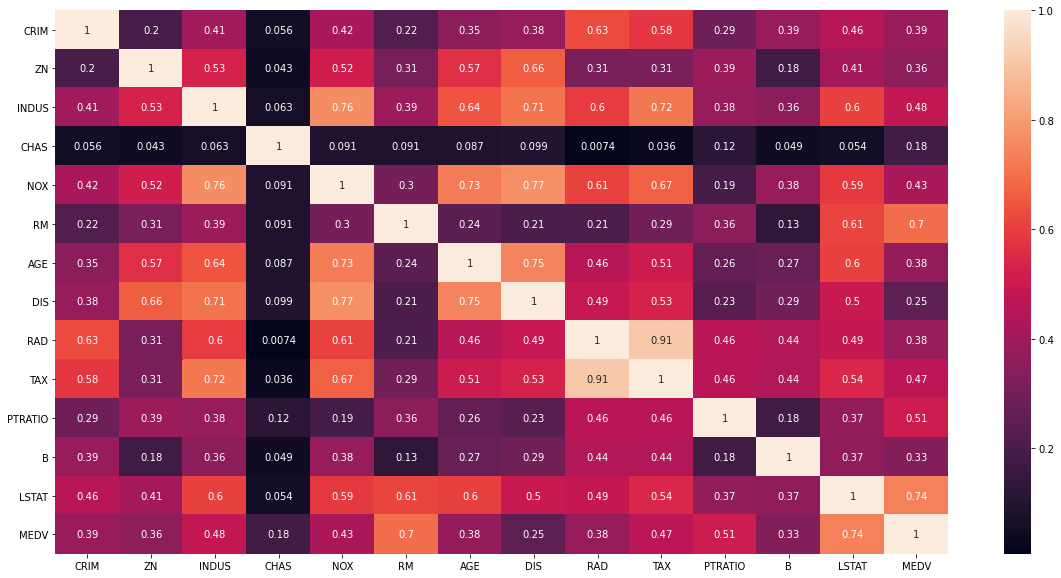

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(20, 10))
sns.heatmap(boston.corr().abs(),  annot=True)

In [22]:
import statsmodels.formula.api as smf

results = smf.ols('MEDV ~ LSTAT + TAX + DIS + ZN', data=boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     202.1
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          4.87e-103
Time:                        07:30:37   Log-Likelihood:                -1597.2
No. Observations:                 506   AIC:                             3204.
Df Residuals:                     501   BIC:                             3226.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.9315      1.245     35.276      0.0

In [23]:
import statsmodels.formula.api as smf

results = smf.ols('MEDV ~ CRIM + INDUS + CHAS + LSTAT + TAX + DIS + ZN', data=boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     125.5
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          1.06e-105
Time:                        07:30:39   Log-Likelihood:                -1583.0
No. Observations:                 506   AIC:                             3182.
Df Residuals:                     498   BIC:                             3216.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.7331      1.323     33.061      0.0